In [20]:
import kasatochi_example as ke
#import kasatochi
from monetio.models import hysplit
from monetio.models import pardump
from utilhysplit import par2conc
import numpy as np
import feature_tracking 

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
kas1 = ke.KasatochiExample()
kas1.stime = datetime.datetime(2008,8,8,4)
kas1.etime = datetime.datetime(2008,8,10,21)

In [16]:
pdumpB = kas1.get_pdump("B",verbose=True)

Record Header  [(28, 2192, 1, 8, 8, 8, 4, 0)]
Date  2008-08-08 04:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Adding data  [(28, 2192, 1, 8, 8, 8, 4, 0)] 2008-08-08 04:00:00
Record Header  [(28, 13152, 1, 8, 8, 8, 5, 0)]
Date  2008-08-08 05:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Adding data  [(28, 13152, 1, 8, 8, 8, 5, 0)] 2008-08-08 05:00:00
Record Header  [(28, 19727, 1, 8, 8, 8, 6, 0)]
Date  2008-08-08 06:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Adding data  [(28, 19727, 1, 8, 8, 8, 6, 0)] 2008-08-08 06:00:00
Record Header  [(28, 26301, 1, 8, 8, 8, 7, 0)]
Date  2008-08-08 07:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Adding data  [(28, 26301, 1, 8, 8, 8, 7, 0)] 2008-08-08 07:00:00
Record Header  [(28, 32875, 1, 8, 8, 8, 8, 0)]
Date  2008-08-08 08:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 

Record Header  [(28, 49193, 1, 8, 8, 9, 17, 0)]
Date  2008-08-09 17:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Adding data  [(28, 49193, 1, 8, 8, 9, 17, 0)] 2008-08-09 17:00:00
Record Header  [(28, 49057, 1, 8, 8, 9, 18, 0)]
Date  2008-08-09 18:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Adding data  [(28, 49057, 1, 8, 8, 9, 18, 0)] 2008-08-09 18:00:00
Record Header  [(28, 48937, 1, 8, 8, 9, 19, 0)]
Date  2008-08-09 19:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Adding data  [(28, 48937, 1, 8, 8, 9, 19, 0)] 2008-08-09 19:00:00
Record Header  [(28, 48807, 1, 8, 8, 9, 20, 0)]
Date  2008-08-09 20:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Adding data  [(28, 48807, 1, 8, 8, 9, 20, 0)] 2008-08-09 20:00:00
Record Header  [(28, 48652, 1, 8, 8, 9, 21, 0)]
Date  2008-08-09 21:00:00  ****  [datetime.datetime(2008

In [27]:
pdumpC = kas1.get_pdump("C",verbose=True)

Record Header  [(28, 1096, 1, 8, 8, 8, 4, 0)]
Date  2008-08-08 04:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Adding data  [(28, 1096, 1, 8, 8, 8, 4, 0)] 2008-08-08 04:00:00
Record Header  [(28, 6576, 1, 8, 8, 8, 5, 0)]
Date  2008-08-08 05:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Adding data  [(28, 6576, 1, 8, 8, 8, 5, 0)] 2008-08-08 05:00:00
Record Header  [(28, 9864, 1, 8, 8, 8, 6, 0)]
Date  2008-08-08 06:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Adding data  [(28, 9864, 1, 8, 8, 8, 6, 0)] 2008-08-08 06:00:00
Record Header  [(28, 13151, 1, 8, 8, 8, 7, 0)]
Date  2008-08-08 07:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Adding data  [(28, 13151, 1, 8, 8, 8, 7, 0)] 2008-08-08 07:00:00
Record Header  [(28, 16436, 1, 8, 8, 8, 8, 0)]
Date  2008-08-08 08:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), 

Record Header  [(28, 24464, 1, 8, 8, 9, 19, 0)]
Date  2008-08-09 19:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Adding data  [(28, 24464, 1, 8, 8, 9, 19, 0)] 2008-08-09 19:00:00
Record Header  [(28, 24388, 1, 8, 8, 9, 20, 0)]
Date  2008-08-09 20:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Adding data  [(28, 24388, 1, 8, 8, 9, 20, 0)] 2008-08-09 20:00:00
Record Header  [(28, 24306, 1, 8, 8, 9, 21, 0)]
Date  2008-08-09 21:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Adding data  [(28, 24306, 1, 8, 8, 9, 21, 0)] 2008-08-09 21:00:00
Record Header  [(28, 24221, 1, 8, 8, 9, 22, 0)]
Date  2008-08-09 22:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Adding data  [(28, 24221, 1, 8, 8, 9, 22, 0)] 2008-08-09 22:00:00
Record Header  [(28, 24161, 1, 8, 8, 9, 23, 0)]
Date  2008-08-09 23:00:00  ****  [datetime.datetime(2008

In [4]:
pdumpD = kas1.get_pdump("D",verbose=False)

Adding data  [(28, 1096, 1, 8, 8, 8, 4, 0)] 2008-08-08 04:00:00
Adding data  [(28, 6576, 1, 8, 8, 8, 5, 0)] 2008-08-08 05:00:00
Adding data  [(28, 9864, 1, 8, 8, 8, 6, 0)] 2008-08-08 06:00:00
Adding data  [(28, 13151, 1, 8, 8, 8, 7, 0)] 2008-08-08 07:00:00
Adding data  [(28, 16437, 1, 8, 8, 8, 8, 0)] 2008-08-08 08:00:00
Adding data  [(28, 19722, 1, 8, 8, 8, 9, 0)] 2008-08-08 09:00:00
Adding data  [(28, 22999, 1, 8, 8, 8, 10, 0)] 2008-08-08 10:00:00
Adding data  [(28, 26271, 1, 8, 8, 8, 11, 0)] 2008-08-08 11:00:00
Adding data  [(28, 29541, 1, 8, 8, 8, 12, 0)] 2008-08-08 12:00:00
Adding data  [(28, 26225, 1, 8, 8, 8, 13, 0)] 2008-08-08 13:00:00
Adding data  [(28, 26172, 1, 8, 8, 8, 14, 0)] 2008-08-08 14:00:00
Adding data  [(28, 26126, 1, 8, 8, 8, 15, 0)] 2008-08-08 15:00:00
Adding data  [(28, 26069, 1, 8, 8, 8, 16, 0)] 2008-08-08 16:00:00
Adding data  [(28, 26014, 1, 8, 8, 8, 17, 0)] 2008-08-08 17:00:00
Adding data  [(28, 25962, 1, 8, 8, 8, 18, 0)] 2008-08-08 18:00:00
Adding data  [(28, 

In [28]:
%autoreload
poll=4
lev=[1000,20000]
pdate = datetime.datetime(2008,8,10,12)
dfD = ke.process_pdump(pdumpD, pdate,lev=lev,poll=poll)
dfC = ke.process_pdump(pdumpC, pdate,lev=lev,poll=poll)
dfB = ke.process_pdump(pdumpB, pdate,lev=lev,poll=poll)

In [23]:
%autoreload
nlist = np.arange(5,70,2)
score = feature_tracking.find_n(dfD, dfC, name1='D', name2='C',verbose=True)

working on 5
working on 10


MassFit getfit method: Could not fit
xra length 3699433


AttributeError: 'MassFit' object has no attribute 'gfit'

working on 5
working on 10
working on 15
working on 20
working on 25
working on 30
working on 35
working on 40
working on 45
working on 50
working on 55
working on 60
working on 65


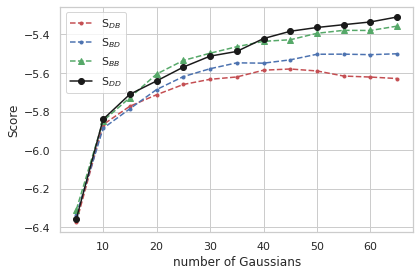

In [26]:
%autoreload
nlist = np.arange(5,70,5)
score = feature_tracking.find_n(dfD, dfB, nlist =nlist, name1='D', name2='B',verbose=True)

In [20]:
# Look at a different time period.
%autoreload
poll=4
lev=[1000,20000]
pdate = datetime.datetime(2008,8,9,4)
dfD = ke.process_pdump(pdumpD, pdate,lev=lev,poll=poll)
dfC = ke.process_pdump(pdumpC, pdate,lev=lev,poll=poll)
dfB = ke.process_pdump(pdumpB, pdate,lev=lev,poll=poll)

working on 5
working on 10
working on 15
working on 20
working on 25
working on 30
working on 35
working on 40
working on 45
working on 50
working on 55
working on 60
working on 65


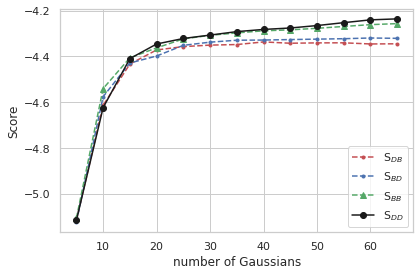

In [21]:
%autoreload
nlist = np.arange(5,70,5)
score = feature_tracking.find_n(dfD, dfB, nlist =nlist, name1='D', name2='B',verbose=True)

In [2]:
%load_ext autoreload
%autoreload
import captex_example as ce

In [3]:
c1 = ce.CaptexExample()

In [13]:
d1 = c1.stime
d2 = d1 + datetime.timedelta(minutes=3*60)
capdfC = c1.get_pdump(1, drange=[d1,d2])

opening ./RunFiles/RunC/PARDUMP.cap1
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 0)] 1983-09-18 21:00:00
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 5)] 1983-09-18 21:05:00
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 10)] 1983-09-18 21:10:00
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 15)] 1983-09-18 21:15:00
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 20)] 1983-09-18 21:20:00
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 25)] 1983-09-18 21:25:00
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 30)] 1983-09-18 21:30:00
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 35)] 1983-09-18 21:35:00
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 40)] 1983-09-18 21:40:00
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 45)] 1983-09-18 21:45:00
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 50)] 1983-09-18 21:50:00
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 55)] 1983-09-18 21:55:00
Adding data  [(28, 5004, 1, 83, 9, 18, 22, 0)] 1983-09-18 22:00:00
Adding data  [(28, 5004, 1, 83, 9, 18, 22, 5)] 1983-09-18 22:05:00
Adding data  [(

In [14]:
capdfD = c1.get_pdump(3,drange=[d1,d2])

opening ./RunFiles/RunD/PARDUMP.cap1
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 0)] 1983-09-18 21:00:00
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 5)] 1983-09-18 21:05:00
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 10)] 1983-09-18 21:10:00
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 15)] 1983-09-18 21:15:00
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 20)] 1983-09-18 21:20:00
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 25)] 1983-09-18 21:25:00
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 30)] 1983-09-18 21:30:00
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 35)] 1983-09-18 21:35:00
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 40)] 1983-09-18 21:40:00
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 45)] 1983-09-18 21:45:00
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 50)] 1983-09-18 21:50:00
Adding data  [(28, 5004, 1, 83, 9, 18, 21, 55)] 1983-09-18 21:55:00
Adding data  [(28, 5004, 1, 83, 9, 18, 22, 0)] 1983-09-18 22:00:00
Adding data  [(28, 5004, 1, 83, 9, 18, 22, 5)] 1983-09-18 22:05:00
Adding data  [(

In [15]:
capdfD.date.unique()

array(['1983-09-18T21:00:00.000000000', '1983-09-18T21:05:00.000000000',
       '1983-09-18T21:10:00.000000000', '1983-09-18T21:15:00.000000000',
       '1983-09-18T21:20:00.000000000', '1983-09-18T21:25:00.000000000',
       '1983-09-18T21:30:00.000000000', '1983-09-18T21:35:00.000000000',
       '1983-09-18T21:40:00.000000000', '1983-09-18T21:45:00.000000000',
       '1983-09-18T21:50:00.000000000', '1983-09-18T21:55:00.000000000',
       '1983-09-18T22:00:00.000000000', '1983-09-18T22:05:00.000000000',
       '1983-09-18T22:10:00.000000000', '1983-09-18T22:15:00.000000000',
       '1983-09-18T22:20:00.000000000', '1983-09-18T22:25:00.000000000',
       '1983-09-18T22:30:00.000000000', '1983-09-18T22:35:00.000000000',
       '1983-09-18T22:40:00.000000000', '1983-09-18T22:45:00.000000000',
       '1983-09-18T22:50:00.000000000', '1983-09-18T22:55:00.000000000',
       '1983-09-18T23:00:00.000000000', '1983-09-18T23:05:00.000000000',
       '1983-09-18T23:10:00.000000000', '1983-09-18

working on 5
working on 10
working on 15
working on 20
working on 25
working on 30
working on 35
working on 40
working on 45
working on 50
working on 55
working on 60
working on 65


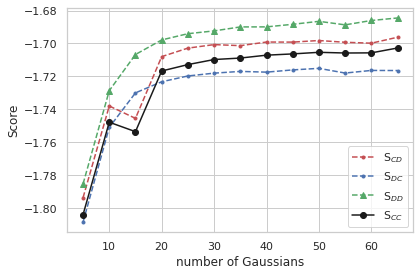

In [25]:

nlist = np.arange(5,70,5)

score = feature_tracking.find_n(capdfC, capdfD, nlist =nlist, name1='C', name2='D',verbose=True)

In [26]:
# look at just the last time period.
d1 = c1.stime
d2 = d1 + datetime.timedelta(minutes=3*60)
t1capdfC = c1.get_pdump(1, drange=[d2,d2])
t1capdfD = c1.get_pdump(3, drange=[d2,d2])

opening ./RunFiles/RunC/PARDUMP.cap1
Adding data  [(28, 5004, 1, 83, 9, 19, 0, 0)] 1983-09-19 00:00:00
opening ./RunFiles/RunD/PARDUMP.cap1
Adding data  [(28, 5004, 1, 83, 9, 19, 0, 0)] 1983-09-19 00:00:00


working on 5
working on 10
working on 15
working on 20
working on 25
working on 30
working on 35
working on 40
working on 45
working on 50
working on 55
working on 60
working on 65


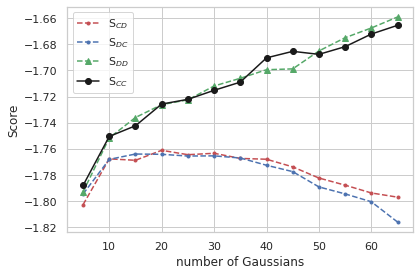

In [27]:

scoret1 = feature_tracking.find_n(t1capdfC, t1capdfD, nlist =nlist, name1='C', name2='D',verbose=True)

In [28]:
d1 = c1.stime
d2 = d1 + datetime.timedelta(minutes=6*60)
t2capdfC = c1.get_pdump(1, drange=[d2,d2])
t2capdfD = c1.get_pdump(3, drange=[d2,d2])

opening ./RunFiles/RunC/PARDUMP.cap1
Adding data  [(28, 5004, 1, 83, 9, 19, 3, 0)] 1983-09-19 03:00:00
opening ./RunFiles/RunD/PARDUMP.cap1
Adding data  [(28, 5004, 1, 83, 9, 19, 3, 0)] 1983-09-19 03:00:00


working on 5
working on 10
working on 15
working on 20
working on 25
working on 30
working on 35
working on 40
working on 45
working on 50
working on 55
working on 60
working on 65


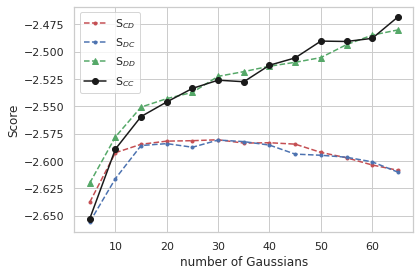

In [29]:

scoret2 = feature_tracking.find_n(t2capdfC, t2capdfD, nlist =nlist, name1='C', name2='D',verbose=True)

In [32]:
# compare the 5,000 particle run with the 50,000 particle run.
d1 = c1.stime
d2 = d1 + datetime.timedelta(minutes=6*60)
t3capdfC = c1.get_pdump(1, drange=[d2,d2])
t3capdfB = c1.get_pdump(2, drange=[d2,d2])

opening ./RunFiles/RunC/PARDUMP.cap1
Adding data  [(28, 5004, 1, 83, 9, 19, 3, 0)] 1983-09-19 03:00:00
opening ./RunFiles/RunB/PARDUMP.cap1
Adding data  [(28, 50004, 1, 83, 9, 19, 3, 0)] 1983-09-19 03:00:00


working on 5
working on 10
working on 15
working on 20
working on 25
working on 30
working on 35
working on 40
working on 45
working on 50
working on 55
working on 60
working on 65


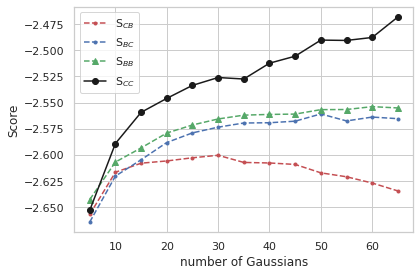

In [33]:
scoret3 = feature_tracking.find_n(t3capdfC, t3capdfB, nlist =nlist, name1='C', name2='B',verbose=True)

In [ ]:
feature_tracking.